# Dectecting YouTube comment spam

### load the dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('YouTube-Spam-Collection-v1/YouTube01-Psy.csv')

In [4]:
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [6]:
df.isnull().sum() # there is no missing data

COMMENT_ID    0
AUTHOR        0
DATE          0
CONTENT       0
CLASS         0
dtype: int64

In [11]:
df['CLASS'].value_counts() # even class

1    175
0    175
Name: CLASS, dtype: int64

### split the data into train and test set

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [24]:
X = df['CONTENT']
y = df['CLASS']

In [25]:
Xtrain, Xtest, ytrain, ytest= train_test_split(X, y, test_size=0.3, random_state=101, shuffle=True)

In [26]:
vectorizer = CountVectorizer()

In [27]:
Xtrain = vectorizer.fit_transform(Xtrain)

In [28]:
Xtest = vectorizer.transform(Xtest)

In [34]:
vectorizer.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [45]:
Xtrain # we have 1057 words, which are words that appear across all of these phrases
       # the train dataset has 245 rows

<245x1057 sparse matrix of type '<class 'numpy.int64'>'
	with 2921 stored elements in Compressed Sparse Row format>

In [47]:
Xtest # the test dataset has 105 rows

<105x1057 sparse matrix of type '<class 'numpy.int64'>'
	with 1048 stored elements in Compressed Sparse Row format>

In [44]:
print(vectorizer.get_feature_names()[-100:]) # the last 100 words 

['vaahidmustafic', 'vakinha', 'vaquinhae', 'vb', 'vid', 'video', 'videos', 'vidios', 'vids', 'view', 'viewed', 'viewer', 'viewing', 'views', 'vip', 'viral', 'virus', 'visiting', 'visits', 'visor', 'visortwin', 'visuelgamingznl', 'voteme', 'voyage', 'wake', 'wallet', 'wank', 'want', 'wanted', 'was', 'wasn', 'waste', 'watch', 'watching', 'water', 'we', 'website', 'weird', 'welcome', 'well', 'wellcome', 'went', 'were', 'westerners', 'what', 'whatever', 'whats', 'when', 'where', 'while', 'white', 'who', 'why', 'wiews', 'will', 'win', 'window', 'windshield', 'with', 'within', 'wonder', 'wonderful', 'woobox', 'words', 'world', 'worldwide_life', 'worth', 'worthless', 'would', 'wow', 'wp', 'wrap', 'wrong', 'www', 'www10', 'xd', 'xx', 'xxbb5tczhm39hvzd', 'yeah', 'year', 'years', 'yeat', 'yellow', 'yet', 'yg', 'you', 'your', 'youtu', 'youtube', 'youtube_corporation_fox_broadcasting_company_anular_os_strikes_no_canal_nostalgia', 'youtuber', 'yr', 'zombie', 'zxlightsoutxz', '강남스타일', 'ｃｏｍｍｅｎｔ', 'ｄａ

### build a Random Forest model

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
clf = RandomForestClassifier(n_estimators=80)

In [52]:
clf.fit(Xtrain, ytrain)

RandomForestClassifier(n_estimators=80)

In [56]:
clf.score(Xtest, ytest) # this model performs well enough

0.9523809523809523

### evaluate the model

In [70]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
prediction = clf.predict(Xtest)

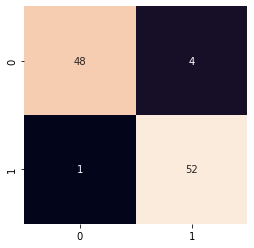

In [75]:
sns.heatmap(confusion_matrix(prediction , ytest), cbar=False, annot=True);
fig = plt.gcf()
fig.set_size_inches(4, 4)

In [76]:
print(classification_report(prediction,ytest))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        52
           1       0.93      0.98      0.95        53

    accuracy                           0.95       105
   macro avg       0.95      0.95      0.95       105
weighted avg       0.95      0.95      0.95       105



In [77]:
from sklearn.model_selection import cross_val_score

In [86]:
scores = cross_val_score(clf, Xtrain, ytrain, cv=5)
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std()*2))

Accuracy: 0.95 (+/- 0.07)


### load a combined new data set 

In [87]:
new_df = pd.concat([pd.read_csv('YouTube-Spam-Collection-v1/YouTube01-Psy.csv'), 
                    pd.read_csv('YouTube-Spam-Collection-v1/Youtube02-KatyPerry.csv'), 
                    pd.read_csv('YouTube-Spam-Collection-v1/Youtube03-LMFAO.csv'), 
                    pd.read_csv('YouTube-Spam-Collection-v1/Youtube04-Eminem.csv'), 
                    pd.read_csv('YouTube-Spam-Collection-v1/Youtube05-Shakira.csv')])

In [89]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1956 entries, 0 to 369
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  1956 non-null   object
 1   AUTHOR      1956 non-null   object
 2   DATE        1711 non-null   object
 3   CONTENT     1956 non-null   object
 4   CLASS       1956 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 91.7+ KB


In [92]:
new_df.isnull().sum()

COMMENT_ID      0
AUTHOR          0
DATE          245
CONTENT         0
CLASS           0
dtype: int64

In [95]:
new_df['CLASS'].value_counts()

1    1005
0     951
Name: CLASS, dtype: int64

In [97]:
df_new = new_df.sample(frac=1)

In [99]:
X = df_new['CONTENT']
y = df_new['CLASS']

### build a pipeline

In [104]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [105]:
Xtrain, Xtest, ytrain, ytest= train_test_split(X, y, test_size=0.3, random_state=101)

In [106]:
pipe = Pipeline([('vectorizer', CountVectorizer()), ('clf', RandomForestClassifier())])

In [107]:
pipe

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('clf', RandomForestClassifier())])

In [108]:
pipe.fit(Xtrain, ytrain)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('clf', RandomForestClassifier())])

### evaluate the pipeline

In [113]:
pipe.score(Xtest, ytest)

0.948892674616695

In [111]:
pipe.predict(['what a neat video'])

array([0])

In [112]:
pipe.predict(['plz subcribe to my channel'])

array([1])

In [115]:
scores = cross_val_score(pipe, X, y, cv=5)
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std()*2))

Accuracy: 0.96 (+/- 0.02)


### build a new pipeline with tfidf added 

In [117]:
from sklearn.feature_extraction.text import TfidfTransformer

In [119]:
Pipe2 = Pipeline([('count', CountVectorizer()), ('Tfidf', TfidfTransformer(norm=None)), ('clf', RandomForestClassifier())])

In [120]:
Pipe2.fit(Xtrain, ytrain)

Pipeline(steps=[('count', CountVectorizer()),
                ('Tfidf', TfidfTransformer(norm=None)),
                ('clf', RandomForestClassifier())])

In [121]:
Pipe2.score(Xtest,ytest)

0.948892674616695

In [123]:
scores = cross_val_score(Pipe2, X, y, cv=5)
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std()*2))

Accuracy: 0.96 (+/- 0.01)


In [127]:
Pipe2.steps

[('count', CountVectorizer()),
 ('Tfidf', TfidfTransformer(norm=None)),
 ('clf', RandomForestClassifier())]

### search for best parameters

In [133]:
from sklearn.model_selection import GridSearchCV

In [137]:
params = {'count__max_features': [None, 1000, 2000], 
         'count__ngram_range':[(1, 1), (1, 2)], 
         'count__stop_words': ['english', None], 
         'Tfidf__use_idf': [True, False], 
         'clf__n_estimators': [20, 50, 100]}

In [138]:
grid = GridSearchCV(Pipe2, params, cv=5, n_jobs=-1)

In [139]:
grid.fit(Xtrain, ytrain) 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('count', CountVectorizer()),
                                       ('Tfidf', TfidfTransformer(norm=None)),
                                       ('clf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'Tfidf__use_idf': [True, False],
                         'clf__n_estimators': [20, 50, 100],
                         'count__max_features': [None, 1000, 2000],
                         'count__ngram_range': [(1, 1), (1, 2)],
                         'count__stop_words': ['english', None]})

In [147]:
grid.best_params_

{'Tfidf__use_idf': True,
 'clf__n_estimators': 100,
 'count__max_features': 1000,
 'count__ngram_range': (1, 2),
 'count__stop_words': 'english'}

In [150]:
grid.best_score_

0.9656720408545226

In [170]:
grid.cv_results_['mean_test_score'].shape[0] #2*3*3*2*2 = 72

72

### build the best model

In [164]:
best_model = grid.best_estimator_

In [166]:
best_model.score(Xtest, ytest)

0.9420783645655877

In [169]:
scores = cross_val_score(Pipe2, X, y, cv=5)
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std()*2))

Accuracy: 0.96 (+/- 0.02)
